In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

### (a). You can also confirm your answers by examining the properties of the graph (e.g., computing the actual size of the GCC).

In [2]:
#initial matrix given by teacher's guidelines
A_initial = np.array([[0.99,0.26],[0.26,0.53]])

#generates adjacency matrix of probability. We're aiming for a 4096 x 4096 matrix
kron_product = np.kron(A_initial,A_initial) #kron product to the power of 1
for i in range(1,11): #will produce kron product to the power of 12
    kron_product = np.kron(kron_product,A_initial)

##converts probability matrix into binary matrix in order to compute graph
kron_binary = kron_product
for i in range(0,kron_product.shape[0]):
    for j in range(0,kron_product.shape[1]):
        rand_num = np.random.uniform(0,1)
        if kron_product[i][j]>rand_num:
            kron_binary[i][j]=1
        else:
            kron_binary[i][j]=0
        
G = nx.from_numpy_matrix(kron_binary)

In [3]:
print("The Kronecker graph has", G.number_of_nodes(),"nodes")
print("The Kronecker graph has",G.number_of_edges(),"edges")
print("Is the Kronecker graph connected?", nx.is_connected(G))

The Kronecker graph has 4096 nodes
The Kronecker graph has 5210 edges
Is the Kronecker graph connected? False


In [9]:
#generates GCC
GCC = max(nx.connected_component_subgraphs(G),key=len)
node_percentage = GCC.number_of_nodes()/G.number_of_nodes()*100
edge_percentage = GCC.number_of_edges()/G.number_of_edges()*100

print("The Kronecker GCC has",GCC.number_of_nodes(), "nodes which represents",node_percentage,"% of all nodes")
print("The Kronecker GCC has",GCC.number_of_edges(), "edges which represents",edge_percentage,"% of all edges")

The Kronecker GCC has 2951 nodes which represents 72.0458984375 % of all nodes
The Kronecker GCC has 5074 edges which represents 97.38963531669866 % of all edges


### (b) [6p]Describe three structural properties which show that the produced graph looks similar (qualitatively or even quantitatively) to the CA-GrQc network. For each of those properties you should examine how they look like in both the original CA-GrQc network and produced Kronecker graph (e.g., compute/visualize property A of CA-GrQc and repeat the same for the Kronecker graph). Explain briefly your observations.

In [5]:
#reinitiliazation of initial graph in Q7
path = 'ca-GrQc.txt'
#Initializing empty graph
G_initial = nx.Graph()  
nodes = []
edgelist = []

#adds all present nodes in list nodes and all edges in edge_list
with open(path) as f:
    for line in f:
        if line[0] != '#':
            line = line.strip()
            FromNodeId, ToNodeId = line.split('\t')
            edge = (FromNodeId,ToNodeId)
            edgelist.append(edge)
            if FromNodeId not in nodes:
                nodes.append(FromNodeId)
            if ToNodeId not in nodes:
                nodes.append(ToNodeId)
                
#add edges from list edges and nodes from list nodes
G_initial.add_nodes_from(nodes)
G_initial.add_edges_from(edgelist)

#generates GCC for initial graph
GCC_initial = max(nx.connected_component_subgraphs(G_initial),key=len)


In [6]:
node_percentage_initial = GCC_initial.number_of_nodes()/G_initial.number_of_nodes()*100
edge_percentage_initial = GCC_initial.number_of_edges()/G_initial.number_of_edges()*100

degree_sequence_initial  = sorted(list(dict(G_initial.degree(nodes)).values()),reverse=True)
degree_sequence  = sorted(list(dict(G.degree(G.nodes())).values()),reverse=True)

triangle_sequences = list(nx.triangles(GCC).values())
triangle_sequences_initial = list(nx.triangles(GCC_initial).values())

Quantitative comparison:
------------------------
Difference in edge percentages of GCC 4.7571849855728345 percentage points
Difference in node percentages of GCC 7.274971459485883 percentage points

- Degree rank comparison


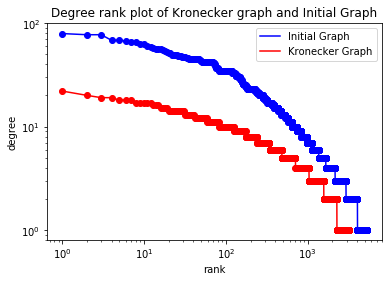

- Triangle participatin distribution


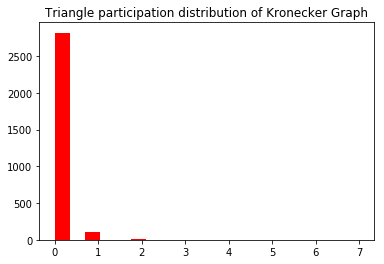

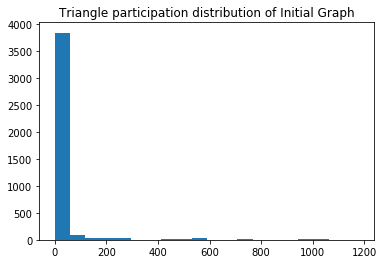

In [10]:
#Quantitative comparison
print("Quantitative comparison:")
print("------------------------")
print("Difference in edge percentages of GCC", abs(edge_percentage_initial-edge_percentage),"percentage points")
print("Difference in node percentages of GCC", abs(node_percentage_initial-node_percentage),"percentage points")
print("")
print("- Degree rank comparison")
plt.figure(1)
plt.loglog(degree_sequence,'r-',marker = 'o')
plt.loglog(degree_sequence_initial,'b-',marker = 'o')
plt.title("Degree rank plot of Kronecker graph and Initial Graph")
plt.ylabel("degree")
plt.xlabel("rank")
blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Initial Graph')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='Kronecker Graph')
plt.legend(handles=[blue_line,red_line])
plt.show()

print("- Triangle participatin distribution")
plt.hist(triangle_sequences,bins=20,color='red')
plt.title("Triangle participation distribution of Kronecker Graph")
plt.show()
plt.hist(triangle_sequences_initial,bins=20)
plt.title("Triangle participation distribution of Initial Graph")
plt.show()

Qualitative comparison
------------------------


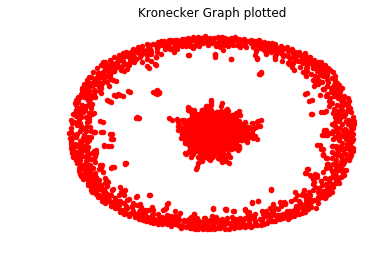

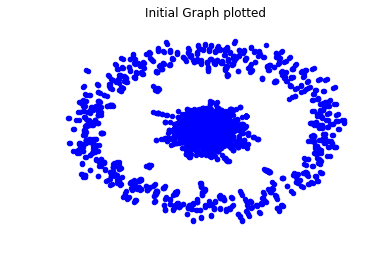

In [8]:
print("Qualitative comparison")
print("------------------------")
pos=nx.spring_layout(G)
plt.axis('off')
plt.title("Kronecker Graph plotted")
nx.draw_networkx_nodes(G,pos,node_size=20)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.show()

pos=nx.spring_layout(G_initial)
plt.axis('off')
plt.title("Initial Graph plotted")
nx.draw_networkx_nodes(G_initial,pos,node_size=20,node_color='b')
nx.draw_networkx_edges(G_initial,pos,alpha=0.4,edge_color='b')
plt.show()

### Observation:
The Kronecker graph model seems to be a very good model to represent the initial graph, both quantitavely and qualitatively.

Quantitatively:
The percentage differences in nodes and edges of GCCs are relatively small. The degree ranks and the triangle participation distributions of both graphs seem to follow the same pattern. I would have wanted to compute the number of hops per reachable pairs of nodes for both graphs but they have too many nodes, so getting all hops of both graphs is a computational bottleneck. 

Qualitatively:
As shown by the plots of the networks, they both have the same clustering patterns.

In conclusion, the Kronecker graph model is appropriate.